In [1]:
import qiskit

In [2]:
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram

In [3]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr,cr)
circuit.x(0)
circuit.rx(-np.pi/2,0)
circuit.x(0)
circuit.rx(-np.pi/2,0)
circuit.measure(qr[0], cr[0])
#circuit.draw(output = 'mpl', initial_state = 'True')
circuit.draw()

┌───┐┌──────────┐┌───┐┌──────────┐┌─┐
  q0: ┤ X ├┤ Rx(-π/2) ├┤ X ├┤ Rx(-π/2) ├┤M├
      └───┘└──────────┘└───┘└──────────┘└╥┘
c0: 1/═══════════════════════════════════╩═
                                         0

C:\Users\shahram\AppData\Local\Temp\ipykernel_10312\3709868074.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator=Aer.get_backend('qasm_simulator')
C:\Users\shahram\AppData\Local\Temp\ipykernel_10312\3709868074.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend = simulator, shots=1024).result()


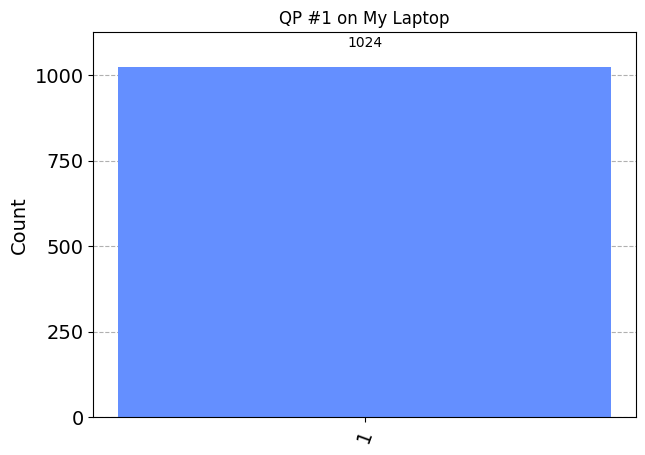

In [4]:
simulator=Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit),title="QP #1 on My Laptop")

In [10]:
circuit1 = QuantumCircuit(1)
circuit1.x(0)
circuit1.rx(-np.pi/2,0)
circuit1.x(0)
circuit1.rx(-np.pi/2,0)

The result state vector is: [0.+0.j 0.+1.j]


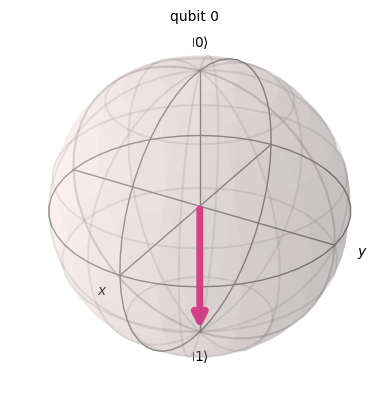

In [11]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

statevec1 = Statevector.from_instruction(circuit1).data
print("The result state vector is:", statevec1)
plot_bloch_multivector(statevec1)

In [8]:
IBMQ.load_account()

C:\Users\shahram\AppData\Local\Temp\ipykernel_10312\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()
C:\Users\shahram\AppData\Local\Temp\ipykernel_10312\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')

In [10]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [18]:
qcom = provider.get_backend('ibm_kyoto')
job = execute(circuit,backend=qcom).result()


C:\Users\shahram\AppData\Local\Temp\ipykernel_10312\2228063013.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit,backend=qcom).result()


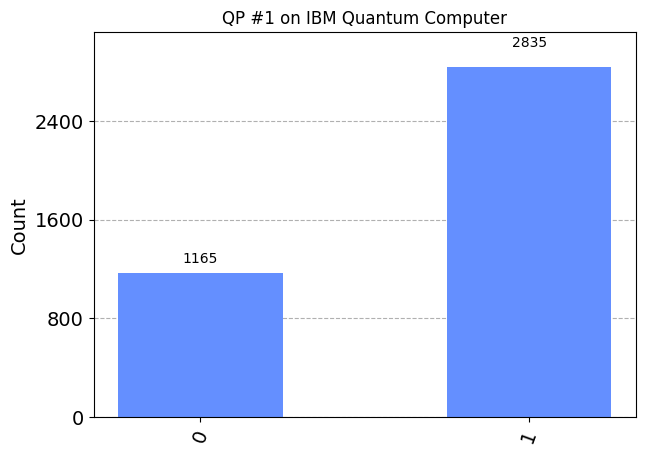

In [19]:
plot_histogram(job.get_counts(),title="QP #1 on IBM Quantum Computer")

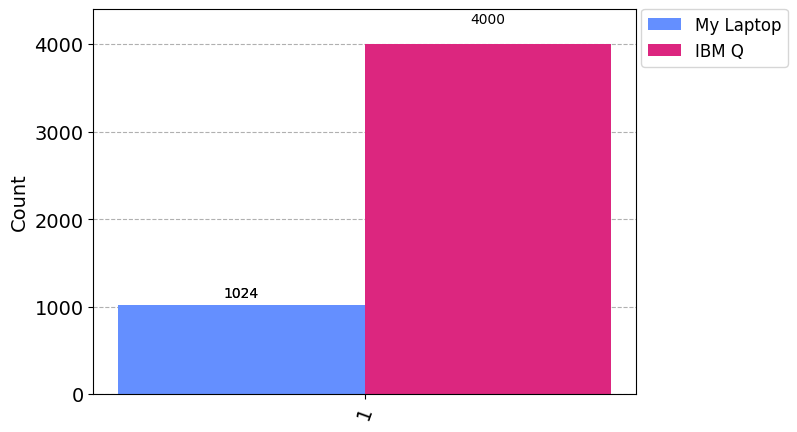

In [13]:
plot_histogram([result.get_counts(circuit),job.get_counts()], legend=["My Laptop","IBM Q"])

The result state vector is: [0.70710678+0.j         0.        -0.70710678j]


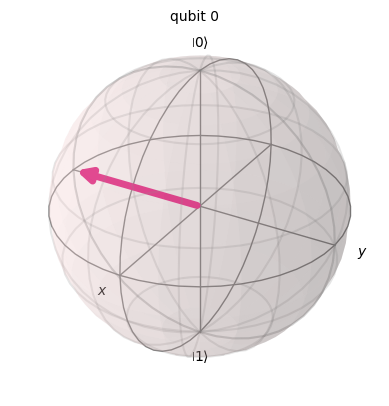

In [38]:
circuit1 = QuantumCircuit(1)
#circuit1.x(0)
#circuit1.h(0)
circuit1.rx(np.pi/2,0)
#circuit1.x(0)
#circuit1.rx(-np.pi/2,0)
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

statevec1 = Statevector.from_instruction(circuit1).data
print("The result state vector is:", statevec1)
plot_bloch_multivector(statevec1)

[ 0.70710678+0.j -0.70710678+0.j]


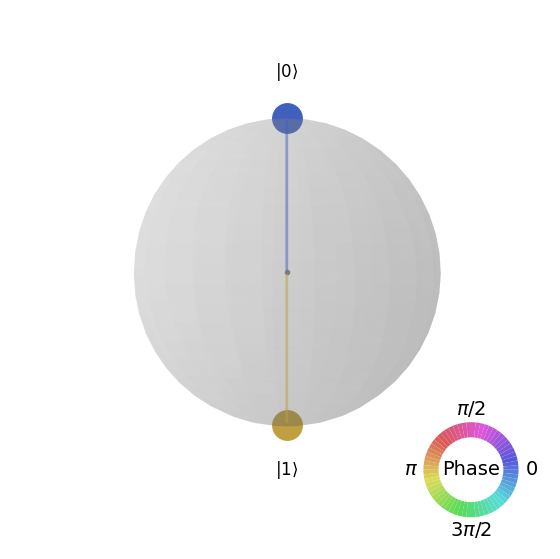

In [20]:
from qiskit.tools.visualization import plot_state_qsphere
statevec2 = Statevector.from_label('000')


new_statevec2 = Statevector.from_instruction(circuit1).data
print(new_statevec2)
plot_state_qsphere(new_statevec2)

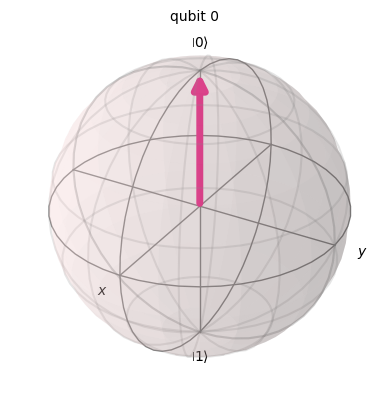

In [32]:
import numpy as np
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
rho_H_matrix = np.array([[1/2,1.j/2],[1.j/2,-1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H_matrix)